In [25]:
#乱数の固定
from tensorflow.keras import utils
utils.set_random_seed(0)

#TensorFlowをインポートし、CIFAR-10のデータを取得します。(CIFAR-10は、飛行機や自動車、鳥などの10カテゴリに属するカラー画像のデータで、さまざまな画像処理システムの学習に使用されています。学習データには50,000枚の画像が、テストデータには10,000枚の画像が含まれ、画像サイズは縦32ピクセル×横32ピクセル)
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()

#取得したデータの中身を確認
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [26]:
#各データをそれぞれ、x_train, y_train, x_test, y_testに代入
(x_train, y_train), (x_test, y_test) = data

#shape関数を利用して、各変数に含まれるデータの構造を確認
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [27]:
#各変数を構成する数値データの最大値と最小値も確認しておきましょう。Numpyのamin関数、amax関数を利用します。
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
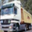

In [28]:
#さらに詳しくデータを確認していきましょう。例えば、x_trainの2つ目のサンプルの画像データを表示してみます
x_train[1]

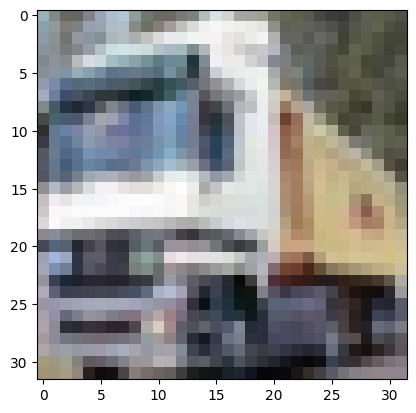

In [29]:
#Matplotlibのpyplotモジュールのimshow関数によって、x_train[1]のデータを可視化
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [30]:
#x_train[1]が何の画像であるかを示す答えである、y_trainの2つ目のサンプルのデータも確認
y_train[1]
#「9」はトラックを意味する数値ラベル

array([9], dtype=uint8)

In [32]:
#x_train, x_testのスケーリング
x_train = x_train / 255
x_test = x_test / 255

#utilsモジュールのto_categorical関数でOne-hotベクトル化
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
#Kerasで画像（CIFAR-10）を判定するCNNを構築しよう #2

In [ ]:
#全体構成
#一般的なCNNの構造を踏襲し、「畳み込み層を複数配置し、その後にプーリング層を配置する」というセットを連続させ、最後に全結合層を複数配置します。今回は、小規模なCNNを構築するため、畳み込み層→プーリング層→畳み込み層→プーリング層→全結合層→全結合層→全結合層という構成にします。

#入力層
#インプットする画像データは、32×32ピクセルのカラー画像であるため、入力層は32×32×3とします。

#畳み込み層
#畳み込み層では、各層ごとに、深さ、活性化関数、直前の層に対するフィルタサイズ、ストライド、ゼロパディングの適用可否を決めます。これらを決めることによって、畳み込み層のノード構成の縦・横・深さのサイズも必然的に決まります。

#畳み込み層の深さは、1つ目を64、2つ目を128とします。これは、VGGNetのモデルを参考にしたものです。活性化関数には、ReLU関数を利用します。フィルタサイズは3×3、ストライドは1、ゼロパディングを適用します。これらは、スタンフォード大学の講義CS231nで推奨されている設定値です。

#プーリング層
#プーリング層でも、CS231nで推奨されている設定値（フィルタサイズ2×2、ストライド2）とし、最大値を取得するMaxPoolingを利用します。

#終盤の全結合層
#出力層を構成するノード数は、予測結果として出力したいデータの要素数と一致させるため、10とします。活性化関数は、ソフトマックス関数を選択します。ソフトマックス関数は、各ノードの出力値の合計を1にする数学的特徴を持った、カテゴリ分類の予測モデルの出力層でよく活用される活性化関数です。

#残り2つの全結合層のノード数については、LeNetの構造を参考に120、84とします。活性化関数は、隠れ層で一般的に活用されるReLU関数を適用します。

In [17]:
#ニューラルネットワーク構造を定義するための主要クラスであるSequential, Flatten, Dense, Conv2D, MaxPooling2Dをインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

#Sequentialクラスをインスタンス化し、CNNを作成するための準備をします。
model = Sequential()

In [18]:
#Sequentialクラスのaddメソッドで、畳み込み層を定義しましょう。(第1引数に畳み込み層の深さ、第2引数にフィルタサイズを指定します。ストライドはデフォルトで1なので、今回は特に指定しません。パディングを適用する場合、paddingパラメータにsameを設定します。活性化関数は、activationパラメータで設定可能です。入力層のデータ構造は、input_shapeパラメータを用いて指定できます。)
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#Sequentialクラスのaddメソッドで、プーリング層を定義しましょう。(MaxPooling2Dクラスの引数で、フィルタサイズ2×2とストライド2を指定できます。フィルタサイズはpool_sizeパラメータを用いて指定します。ストライドはデフォルトでフィルタサイズと同じ大きさになる)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
#上記と同様の手順で、2つ目の畳み込み層と、2つ目のプーリング層を追加
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
#Sequentialクラスのaddメソッドで、全結合層を定義しましょう。3つの全結合層を追加しましょう。まず、直前のプーリング層から全結合層へデータが移る際に、3次元構造を1次元構造に変換しなければなりません。この際、Flattenクラスを使用します。その後、Denseクラスを使って、各層のノード数と活性化関数を設定
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
#定義したCNNが、検討内容どおりに完成しているかを可視化して確認
model.summary()
#「Output Shape」列では各層から次の層へ伝わるデータの形状が表示されており、「Param」列では各層が保持するパラメータ数（重みと閾値の数）が表示されています。
#Flattenと表示されている層は、プーリング層から出力される3次元構造のデータを1次元構造に変換したデータを指しており、プーリング層でも全結合層でもありません。

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │         983,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,069,822 (4.08 MB)

 Trainable params: 1,069,822 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Sequentialクラスのcompileメソッドを使って、損失関数にカテゴリ交差エントロピー誤差を、最適化方法にAdamを、評価指標に正解率を設定
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [34]:
#引数には、学習データであるx_train, y_trainを指定し、batch_sizeパラメータにバッチサイズ数「128」を、epochsパラメータにエポック数「10」を、validation_splitに学習データからバリデーションデータとして切り分けるデータの割合「0.1」を指定
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 2), output.shape=(None, 10)